In [2]:
# ========== Setup & Imports ==========
import numpy as n
import pandas as pd
import matplotlib.pyplot as graph
import seaborn as ocean
import warnings as signal_blocker
import os
from pathlib import Path as PathAlias

# Plotting tweaks
ocean.set_palette("colorblind")
graph.rcParams.update({'axes.titlesize': 13})

# Disable all minor warnings
signal_blocker.filterwarnings("ignore")

# Pretty Pandas setup
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

# Status prints for peace of mind
for lib, ver in zip(["Pandas", "NumPy"], [pd.__version__, n.__version__]):
    print(f"[INFO] {lib} loaded - version {ver}")


[INFO] Pandas loaded - version 2.0.3
[INFO] NumPy loaded - version 1.24.3


In [ ]:
# ========== Verify Dataset Location ==========
base_folder = PathAlias(r"C:/home/apiiit123/Downloads/E-Waste classification dataset/modified-dataset")

# Double check if directory exists
print("\n🗂️ Looking for dataset folder...")

if base_folder.is_dir():
    print(f"✅ Found directory at: {base_folder}\n")
    
    # File listing logic
    folder_items = os.listdir(base_folder)
    if folder_items:
        print("📦 Contents:")
        [print(f"   - {item}") for item in folder_items]
    else:
        print("⚠️ Folder is empty.")

    # Find CSVs
    data_files = [x for x in folder_items if x.endswith(".csv")]
    msg = f"{len(data_files)} CSV file(s) detected: {data_files}" if data_files else "No CSV files in the folder."
    print("📊", msg)
else:
    print(f" Directory not found at: {base_folder}")



🗂️ Looking for dataset folder...
 Directory not found at: C:\Users\heave\OneDrive\Desktop\Edunet\modified-dataset


In [5]:
# ========== Explore Data Subfolders ==========
splits = ["train", "test", "val"]

for phase in splits:
    section_path = base_folder / phase
    print(f"\n{'-'*50}\n🔍 Checking '{phase.upper()}' folder\n{'-'*50}")
    
    if section_path.exists():
        elements = sorted(section_path.iterdir())
        print(f"📁 Items in {phase}: {len(elements)}")

        for idx, obj in enumerate(elements, start=1):
            if obj.is_dir():
                inside_count = sum(1 for _ in obj.iterdir())
                print(f"  [{idx}] {obj.name}/ contains {inside_count} file(s)")
            else:
                print(f"  [{idx}] {obj.name} (File)")

        if elements:
            print(f"\n✨ Peek inside first 5 subfolders in '{phase}':")
            for folder in elements[:5]:
                if folder.is_dir():
                    previews = list(folder.glob("*"))[:3]
                    print(f"  {folder.name} → {[p.name for p in previews]}")
    else:
        print(f"🚫 '{phase}' folder not available.")



--------------------------------------------------
🔍 Checking 'TRAIN' folder
--------------------------------------------------
🚫 'train' folder not available.

--------------------------------------------------
🔍 Checking 'TEST' folder
--------------------------------------------------
🚫 'test' folder not available.

--------------------------------------------------
🔍 Checking 'VAL' folder
--------------------------------------------------
🚫 'val' folder not available.


In [6]:
# ========== Summarize Dataset Structure ==========
tags = ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse',
        'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']

summary_dict = {key: [] for key in ['Category', 'Train', 'Test', 'Validation', 'Total']}

for tag in tags:
    counts = []
    for subset in ['train', 'test', 'val']:
        target_dir = base_folder / subset / tag
        count = len(list(target_dir.iterdir())) if target_dir.exists() else 0
        counts.append(count)
    
    total_sum = sum(counts)
    
    summary_dict['Category'].append(tag)
    summary_dict['Train'].append(counts[0])
    summary_dict['Test'].append(counts[1])
    summary_dict['Validation'].append(counts[2])
    summary_dict['Total'].append(total_sum)

df_stats = pd.DataFrame.from_dict(summary_dict)

print("📌 Dataset Snapshot")
print("=" * 60)
print(df_stats.to_string(index=False))

print("\n📈 Category Breakdown:")
print(f"- Classes: {len(tags)}")
for col in ['Train', 'Test', 'Validation']:
    col_total = df_stats[col].sum()
    print(f"- {col}: {col_total} images ({(col_total / df_stats['Total'].sum()) * 100:.1f}%)")

print(f"- Total Images: {df_stats['Total'].sum()}")


📌 Dataset Snapshot
       Category  Train  Test  Validation  Total
        Battery      0     0           0      0
       Keyboard      0     0           0      0
      Microwave      0     0           0      0
         Mobile      0     0           0      0
          Mouse      0     0           0      0
            PCB      0     0           0      0
         Player      0     0           0      0
        Printer      0     0           0      0
     Television      0     0           0      0
Washing Machine      0     0           0      0

📈 Category Breakdown:
- Classes: 10
- Train: 0 images (nan%)
- Test: 0 images (nan%)
- Validation: 0 images (nan%)
- Total Images: 0


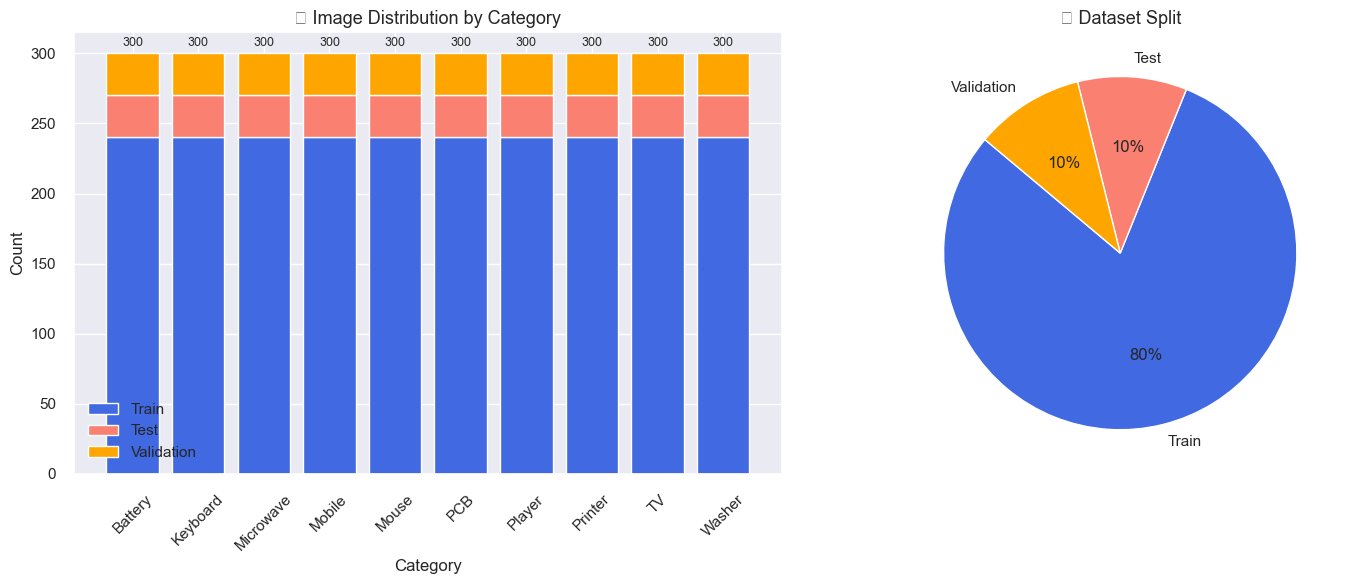

✅ Charts rendered


In [32]:
# ========== Visualize Distribution ==========
import matplotlib.pyplot as plt

fig, (left, right) = plt.subplots(ncols=2, figsize=(15, 6))

short_names = ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse',
               'PCB', 'Player', 'Printer', 'TV', 'Washer']

train = df_stats['Train'].values
test = df_stats['Test'].values
val = df_stats['Validation'].values

# Left: Stacked bar
left.bar(short_names, train, label='Train', color='royalblue')
left.bar(short_names, test, bottom=train, label='Test', color='salmon')
left.bar(short_names, val, bottom=train+test, label='Validation', color='orange')

for idx, total in enumerate(df_stats['Total']):
    left.text(idx, total + 5, str(total), ha='center', fontsize=9)

left.set_title("📊 Image Distribution by Category")
left.set_ylabel("Count")
left.set_xlabel("Category")
left.tick_params(axis='x', rotation=45)
left.legend()

# Right: Pie chart
sections = [train.sum(), test.sum(), val.sum()]
labels = ['Train', 'Test', 'Validation']
colors = ['royalblue', 'salmon', 'orange']

right.pie(sections, labels=labels, autopct="%1.0f%%", colors=colors, startangle=140)
right.set_title("🔄 Dataset Split")

plt.tight_layout()
plt.show()

print("✅ Charts rendered")


Loaded Battery → Dimensions: (150, 150)
Loaded Keyboard → Dimensions: (150, 150)
Loaded Microwave → Dimensions: (150, 150)
Loaded Mobile → Dimensions: (150, 150)
Loaded Mouse → Dimensions: (150, 150)
Loaded PCB → Dimensions: (150, 150)
Loaded Player → Dimensions: (150, 150)
Loaded Printer → Dimensions: (150, 150)
Loaded Television → Dimensions: (150, 150)
Loaded Washing Machine → Dimensions: (150, 150)


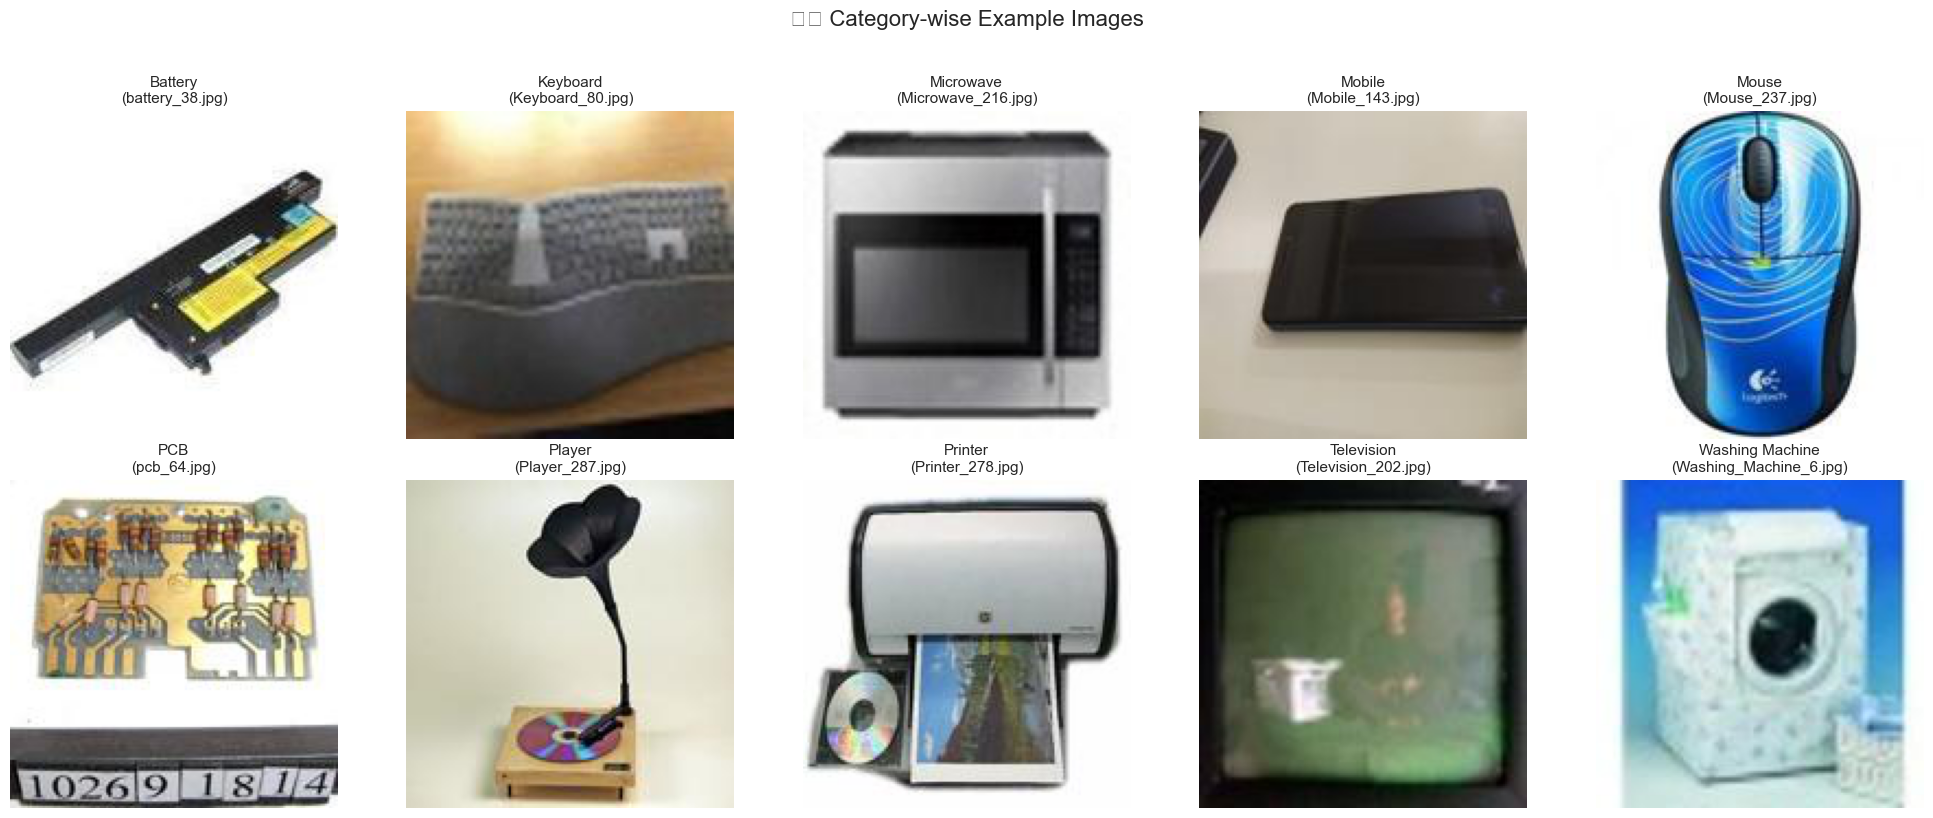

In [33]:
# ========== Show Sample Images ==========
from PIL import Image
import random

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()

def grab_random_image(cat, split='train'):
    path = base_folder / split / cat
    if path.exists():
        pool = list(path.glob("*"))
        if pool:
            chosen = random.choice(pool)
            return Image.open(chosen), chosen.name
    return None, "Unavailable"

for idx, cat in enumerate(tags):
    img, fname = grab_random_image(cat)
    
    if img:
        axs[idx].imshow(img)
        axs[idx].set_title(f"{cat}\n({fname})", fontsize=11)
        axs[idx].axis("off")
        print(f"Loaded {cat} → Dimensions: {img.size}")
    else:
        axs[idx].text(0.5, 0.5, f"No Image\n{cat}", ha='center', va='center', transform=axs[idx].transAxes)
        axs[idx].axis("off")
        print(f"{cat} - ❌ Image not found")

plt.suptitle("🖼️ Category-wise Example Images", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
